In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise sheet 2

## Task 1

In [267]:
def sin(x):
    return np.sin(x)


In [268]:
def f(pts, vals):
    """
    Calculate coefficients of Newton interpol by
    divided differences.

    input:
       pts ... list of points
       val ... list of values

    output:
       divided differences
    """

    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            # print ("i =",i, ", j =",j)
            dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd


Hermite: $p(x) := f(x_{0}) + \sum_{i = 1}^{n}f[x_{0}, ..., x_{i}] \prod_{j=0}^{i - 1}(x-x_{j})$

In [269]:
def hermite(pts, vals, x):
    fs = f(pts, vals) # divided differences
    sum = 0
    for i in range(1, len(pts)):
        fi = fs[i]
        prod = 1
        for j in range(0, i):
            prod *= (x - pts[j])
        sum += fi * prod
    return vals[0] + sum

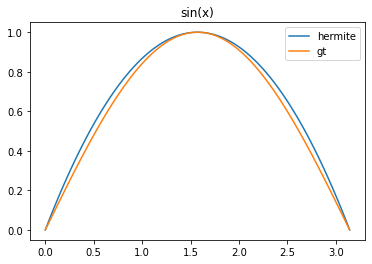

In [270]:
pts = np.array([0, np.pi / 2, np.pi])
val = sin(pts)

x = np.linspace(0, np.pi, 100)
y = hermite(pts, val, x)

plt.plot(x, y, label="hermite")

y = np.sin(x)
plt.plot(x, y, label="gt")

plt.title("sin(x)")
plt.legend()
plt.show()

implementation of the atkin neville scheme

In [271]:
def aitken_neville(x,vals,x_bar):
    n = len(x)-1
    for m in range(1,n):
        for j in range(0,n-m):
            vals[j] = ((x_bar-x[j])*vals[j+1] - (x_bar-x[j+m])*vals[j])/(x[j+m]-x[j])
    return vals[0]

$D$ approximates the derivative of a function.

In [272]:
def D(x_, h):
    #print(np.around(pts, 2))
    #print(np.around(val, 2))
    return (hermite(pts, np.sin(pts), x_ + h) - hermite(pts, np.sin(pts), x_)) / h

$D_{f,sym}$ also approximates the derivative of a function from both sides.

Compute the error between the approximated derivative and the real derivative. Since we can not compute
the derivative $D$ of $f$ (division by $h = 0$), we use small values of $h$ and approximate the derivative using the atkin neville scheme.
Then we can extrapolate the derivative by looking at $h = 0$.

In [273]:
def diff(q, x):
    h = [q**i for i in range(0,20)]
    ds = [D(x,i) for i in h] # compute interpolation y values
    res = aitken_neville(h, ds, 0) # extrapolate at position 0
    print("hermite: ", round(x, 2), "->",  round(res, 2))
    print("gt:      ", round(x, 2), "->",  round(np.cos(x), 2))

compute the errors for different values of $q$

Now we need to test whether $f(x_{i}) = p(x_{i})$ and $f'(x_{i}) = p'(x_{i})$

In [274]:
x = 0
q = 0.5
diff(q, x)

x = np.pi / 2
diff(q, x)

x = np.pi
diff(q, x)

hermite:  0 -> 1.27
gt:       0 -> 1.0
hermite:  1.57 -> 0.0
gt:       1.57 -> 0.0
hermite:  3.14 -> -1.27
gt:       3.14 -> -1.0
